In [1]:
%run ./03_data_preprocessing.ipynb


(1000, 21)
Head
    0   1    2    3     4    5    6   ...    14 15    16  17    18    19 20
0  A11   6  A34  A43  1169  A65  A75  ...  A152  2  A173   1  A192  A201  1
1  A12  48  A32  A43  5951  A61  A73  ...  A152  1  A173   1  A191  A201  2
2  A14  12  A34  A46  2096  A61  A74  ...  A152  1  A172   2  A191  A201  1
3  A11  42  A32  A42  7882  A61  A74  ...  A153  1  A173   2  A191  A201  1
4  A11  24  A33  A40  4870  A61  A73  ...  A153  2  A173   2  A191  A201  2

[5 rows x 21 columns]

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   obje

C:\Users\suraj\AppData\Local\Temp\ipykernel_49840\2540206259.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/raw/german.data",
C:\Users\suraj\AppData\Local\Temp\ipykernel_49840\3838134564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purpose'].fillna(df['Purpose'].mode()[0], inplace=True)


<h3>Logistic Regression</h3>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

#train the model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#prediction
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.785
ROC AUC: 0.8086904761904762

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       140
           1       0.68      0.53      0.60        60

    accuracy                           0.79       200
   macro avg       0.75      0.71      0.73       200
weighted avg       0.78      0.79      0.78       200



<h3>Decision Tree</h3>

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.655
ROC AUC: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       140
           1       0.68      0.53      0.60        60

    accuracy                           0.79       200
   macro avg       0.75      0.71      0.73       200
weighted avg       0.78      0.79      0.78       200



<h3>Random Forest Classifier</h3>

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.775
ROC AUC: 0.794702380952381

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       140
           1       0.74      0.38      0.51        60

    accuracy                           0.78       200
   macro avg       0.76      0.66      0.68       200
weighted avg       0.77      0.78      0.75       200



<h2>Gradient Boosting model (sklearn)</h2>

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import( accuracy_score, roc_auc_score, classification_report, confusion_matrix,precision_recall_curve,auc)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
#Train a simple Gradient model

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
#Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.79
ROC AUC: 0.7858333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       140
           1       0.69      0.55      0.61        60

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200

Confusion Matrix:
 [[125  15]
 [ 27  33]]


<Figure size 600x500 with 0 Axes>

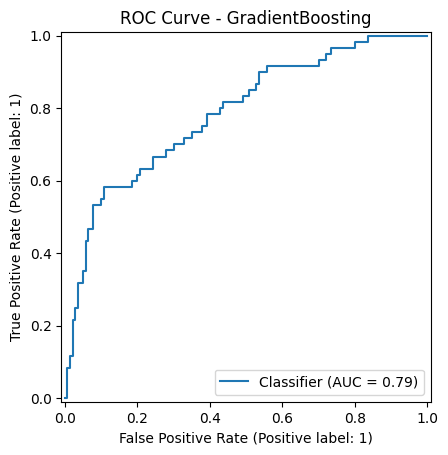

In [7]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_test, y_proba_gb)
plt.title("ROC Curve - GradientBoosting")
plt.show()

PR-AUC: 0.613456864386977


<Figure size 600x500 with 0 Axes>

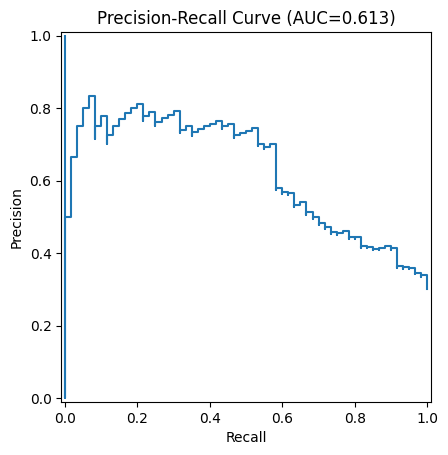

In [8]:
# Precision-Recall curve
y_prec, y_rec, _ = precision_recall_curve(y_test, y_proba_gb)
pr_auc = auc(y_rec, y_prec)
print("PR-AUC:", pr_auc)

plt.figure(figsize=(6,5))
PrecisionRecallDisplay(precision=y_prec, recall=y_rec).plot()
plt.title(f"Precision-Recall Curve (AUC={pr_auc:.3f})")
plt.show()

<h4>Feature importance</h4>

Credit_amount                                          0.186725
Status_of_existing_checking_account_A14                0.182689
Duration_in_month                                      0.110355
Age_in_years                                           0.060118
Savings_account_bonds_A65                              0.046531
Credit_history_A34                                     0.030205
Other_installment_plans_A143                           0.029589
Present_employment_since_A72                           0.023712
Purpose_Education                                      0.023552
Installment_rate_in_percentage_of_disposable_income    0.020820
Property_A124                                          0.019718
Credit_history_A31                                     0.019142
Property_A123                                          0.017834
Purpose_Car (new)                                      0.017509
Savings_account_bonds_A64                              0.015369
dtype: float64


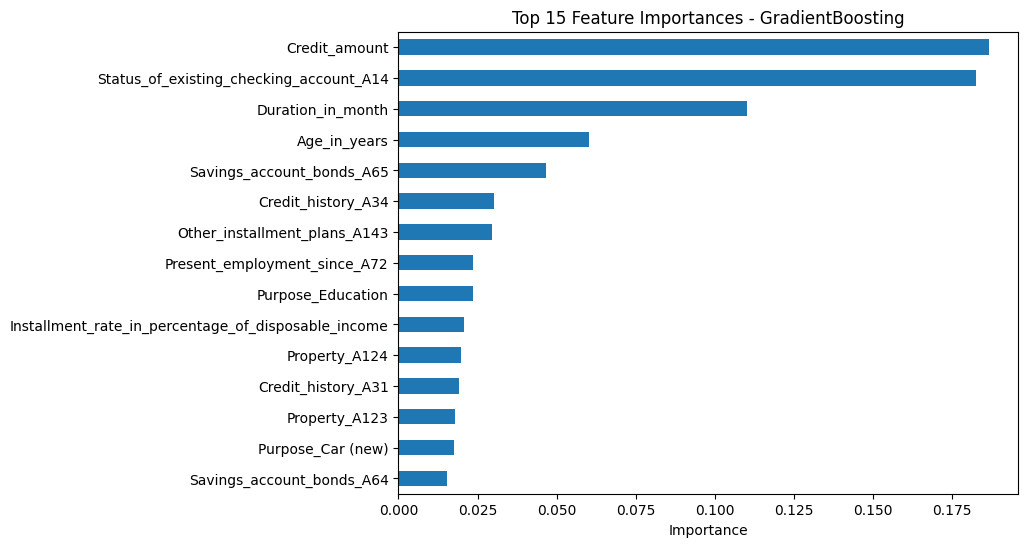

In [9]:
# feature importances
feat_imp = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# show top 15
print(feat_imp.head(15))

# plot top 15
feat_imp.head(15).plot(kind="barh", figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - GradientBoosting")
plt.xlabel("Importance")
plt.show()


In [10]:
y_proba_gb_train = gb.predict_proba(X_train)[:, 1]
print("Train ROC-AUC:", roc_auc_score(y_train, y_proba_gb_train))
print("Test  ROC-AUC:", roc_auc_score(y_test, y_proba_gb))


Train ROC-AUC: 0.964672619047619
Test  ROC-AUC: 0.7858333333333334


In [11]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]   # randomness to reduce overfit
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
gs = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV ROC-AUC:", gs.best_score_)

# evaluate best estimator on test set
best = gs.best_estimator_
y_proba_best = best.predict_proba(X_test)[:, 1]
print("Test ROC-AUC (best):", roc_auc_score(y_test, y_proba_best))


Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best CV ROC-AUC: 0.7833333333333333
Test ROC-AUC (best): 0.8119047619047619


<h5>Model Saving</h5>

In [12]:
import os

os.makedirs("../models", exist_ok=True)  # creates the folder if it doesn't exist

import joblib
joblib.dump(gb, "../models/gb_plain.joblib")     # plain model


['../models/gb_plain.joblib']

<h4>Cross Validation</h4>

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gb = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    subsample=1.0,
    random_state=42
)

cv_scores = cross_val_score(gb, X_train, y_train, cv=cv, scoring='roc_auc')

print("Cross-validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Std ROC-AUC:", cv_scores.std())

Cross-validation ROC-AUC scores: [0.81770833 0.77213542 0.76841518 0.7172619  0.80282738]
Mean ROC-AUC: 0.7756696428571428
Std ROC-AUC: 0.03458721183224398
